# Data Exploration IPython Notebook

In [1]:
# last modified by: lindali
# last modified: 2/16/16

In [2]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Loading Data

In [3]:
# complaints (311)
complaints = pd.read_csv('Housing_Maintenance_Code_Complaints.csv', parse_dates=['ReceivedDate', 'StatusDate'])

In [5]:
# segment to manhattan only
complaints = complaints[complaints['BoroughID']==1]
print complaints.dtypes

ComplaintID                int64
BuildingID                 int64
BoroughID                  int64
Borough                   object
HouseNumber               object
StreetName                object
Zip                      float64
Block                      int64
Lot                        int64
Apartment                 object
CommunityBoard             int64
ReceivedDate      datetime64[ns]
StatusID                   int64
Status                    object
StatusDate        datetime64[ns]
dtype: object


In [6]:
print len(complaints)
print complaints.head()

126245
   ComplaintID  BuildingID  BoroughID    Borough HouseNumber  \
0      6960137        3418          1  MANHATTAN        1989   
1      6960832        3512          1  MANHATTAN        2267   
2      6946867        5318          1  MANHATTAN         778   
3      6966946        5608          1  MANHATTAN        1640   
4      6963755        7851          1  MANHATTAN        2586   

                StreetName    Zip  Block  Lot Apartment  CommunityBoard  \
0  ADAM C POWELL BOULEVARD  10026   1904    4       12D              10   
1  ADAM C POWELL BOULEVARD  10030   1918    4        3B              10   
2                11 AVENUE  10019   1083    1        4P               4   
3         AMSTERDAM AVENUE  10031   2073   29        5A               9   
4                 BROADWAY  10025   1869   44        2B               7   

  ReceivedDate  StatusID Status StatusDate  
0   2014-07-07         2  CLOSE 2014-07-29  
1   2014-07-08         2  CLOSE 2014-07-12  
2   2014-06-19        

In [17]:
# violations  (LL selected columns to reduce data size)
violations = pd.read_csv('Violations_2015.csv', parse_dates=['InspectionDate']) # violations

In [18]:
# segment to manhattan only
violations = violations[violations['BoroID']==1]
print len(violations)

118541


In [19]:
print violations.head()

   Unnamed: 0  ViolationID  BuildingID  RegistrationID  BoroID       Boro  \
0      393664     10506902          14          115401       1  MANHATTAN   
1      393665     10506854          14          115401       1  MANHATTAN   
2      393666     10506855          14          115401       1  MANHATTAN   
3      393669     10506853          14          115401       1  MANHATTAN   
4      393671     10501718          30          102324       1  MANHATTAN   

  HouseNumber LowHouseNumber HighHouseNumber StreetName  StreetCode    Zip  \
0        1058           1058            1064   1 AVENUE       10010  10022   
1        1058           1058            1064   1 AVENUE       10010  10022   
2        1058           1058            1064   1 AVENUE       10010  10022   
3        1058           1058            1064   1 AVENUE       10010  10022   
4        1097           1097            1097   1 AVENUE       10010  10065   

  Apartment Story  Block  Lot Class InspectionDate ApprovedDate  Ord

In [20]:
# Class: indicator of seriousness of the violations, where A is the least serious and C is the most serious
print violations['Class'].value_counts()

# let's only look at the most serious (C) violations
violations = violations[violations['Class']=='C']
print len(violations)

B    56370
C    23693
A    23323
I    15155
dtype: int64
23693


In [21]:
# what are the top serious violation types? LL: email update on top 5 violations types (sent 2/16/16)
# Order Number: reference to the abstract description of the violation condition which cites a specific section of the 
#               law which is in violation
print violations['OrderNumber'].value_counts()

790     2128
510     1918
508     1842
670     1527
742     1367
505     1361
617     1285
616     1192
672     1135
583     1091
526     1079
501     1047
502     1043
666      734
550      550
671      533
506      433
507      313
512      293
514      291
689      286
509      246
664      231
577      181
791      172
567      147
688      143
598      120
576      114
546       93
        ... 
551       20
970       13
966       13
658       12
618       11
674       10
515        9
802        9
717        8
801        6
80         6
810        5
1042       5
826        5
805        4
877        4
804        4
964        3
846        3
51         3
807        3
808        3
988        3
989        2
849        1
949        1
518        1
876        1
81         1
809        1
dtype: int64


In [10]:
# 1. what data can we find on buildings (year built, material, type, etc.)
# 2. at what level is this data provided (bbl, bin, address?)
# 3. how can we tie this to the complaints/violations data (bbl, possibly bin (found a file called Buildings_Subject_to_HPD_Jurisdiction.csv))

## mapping count of violations per zipcode

In [11]:
#zip code json file 
zipcode = gpd.read_file('nyc-zip-code-tabulation-areas-polygons.geojson') 

In [12]:
zipcode.head(1)

@id  BLDGpostalCode CTY_FIPS  \
0  http://nyc.pediacities.com/Resource/PostalCode...               0      081   

   OBJECTID          PO_NAME STATE ST_FIPS     Shape_Area    Shape_Leng  \
0         1  Jackson Heights    NY      36  20163283.8744  20624.692317   

  borough                                           geometry postalCode  
0  Queens  POLYGON ((-73.86942457284175 40.74915687096787...      11372

In [14]:
violations = violations.rename(columns={'Zip': 'zipcode'})
zipcode = zipcode.rename(columns = {'postalCode' : 'zipcode'})
violations['zipcode'] = violations['zipcode'].astype(float)
zipcode['zipcode'] = zipcode['zipcode'].astype(float)

In [15]:
violationcount = violations.groupby('zipcode').count()
violationcount['zipcode'] = violationcount.index
violationcount.head(2)

Unnamed: 0  ViolationID  BuildingID  RegistrationID  BoroID  Boro  \
zipcode                                                                      
2011              1            1           1               1       1     1   
10001           687          687         687             687     687   687   

         HouseNumber  LowHouseNumber  HighHouseNumber  StreetName  StreetCode  \
zipcode                                                                         
2011               1               1                1           1           1   
10001            687             687              687         687         687   

         Apartment  Story  Block  Lot  Class  InspectionDate  ApprovedDate  \
zipcode                                                                      
2011             0      0      1    1      1               1             1   
10001          305    486    687  687    687             687           687   

         OrderNumber  zipcode  
zipcode                        
2011               1     2011  
10001            687    10001

In [17]:
violationzip = pd.merge (zipcode,violationcount,  how='inner', on=['zipcode'])

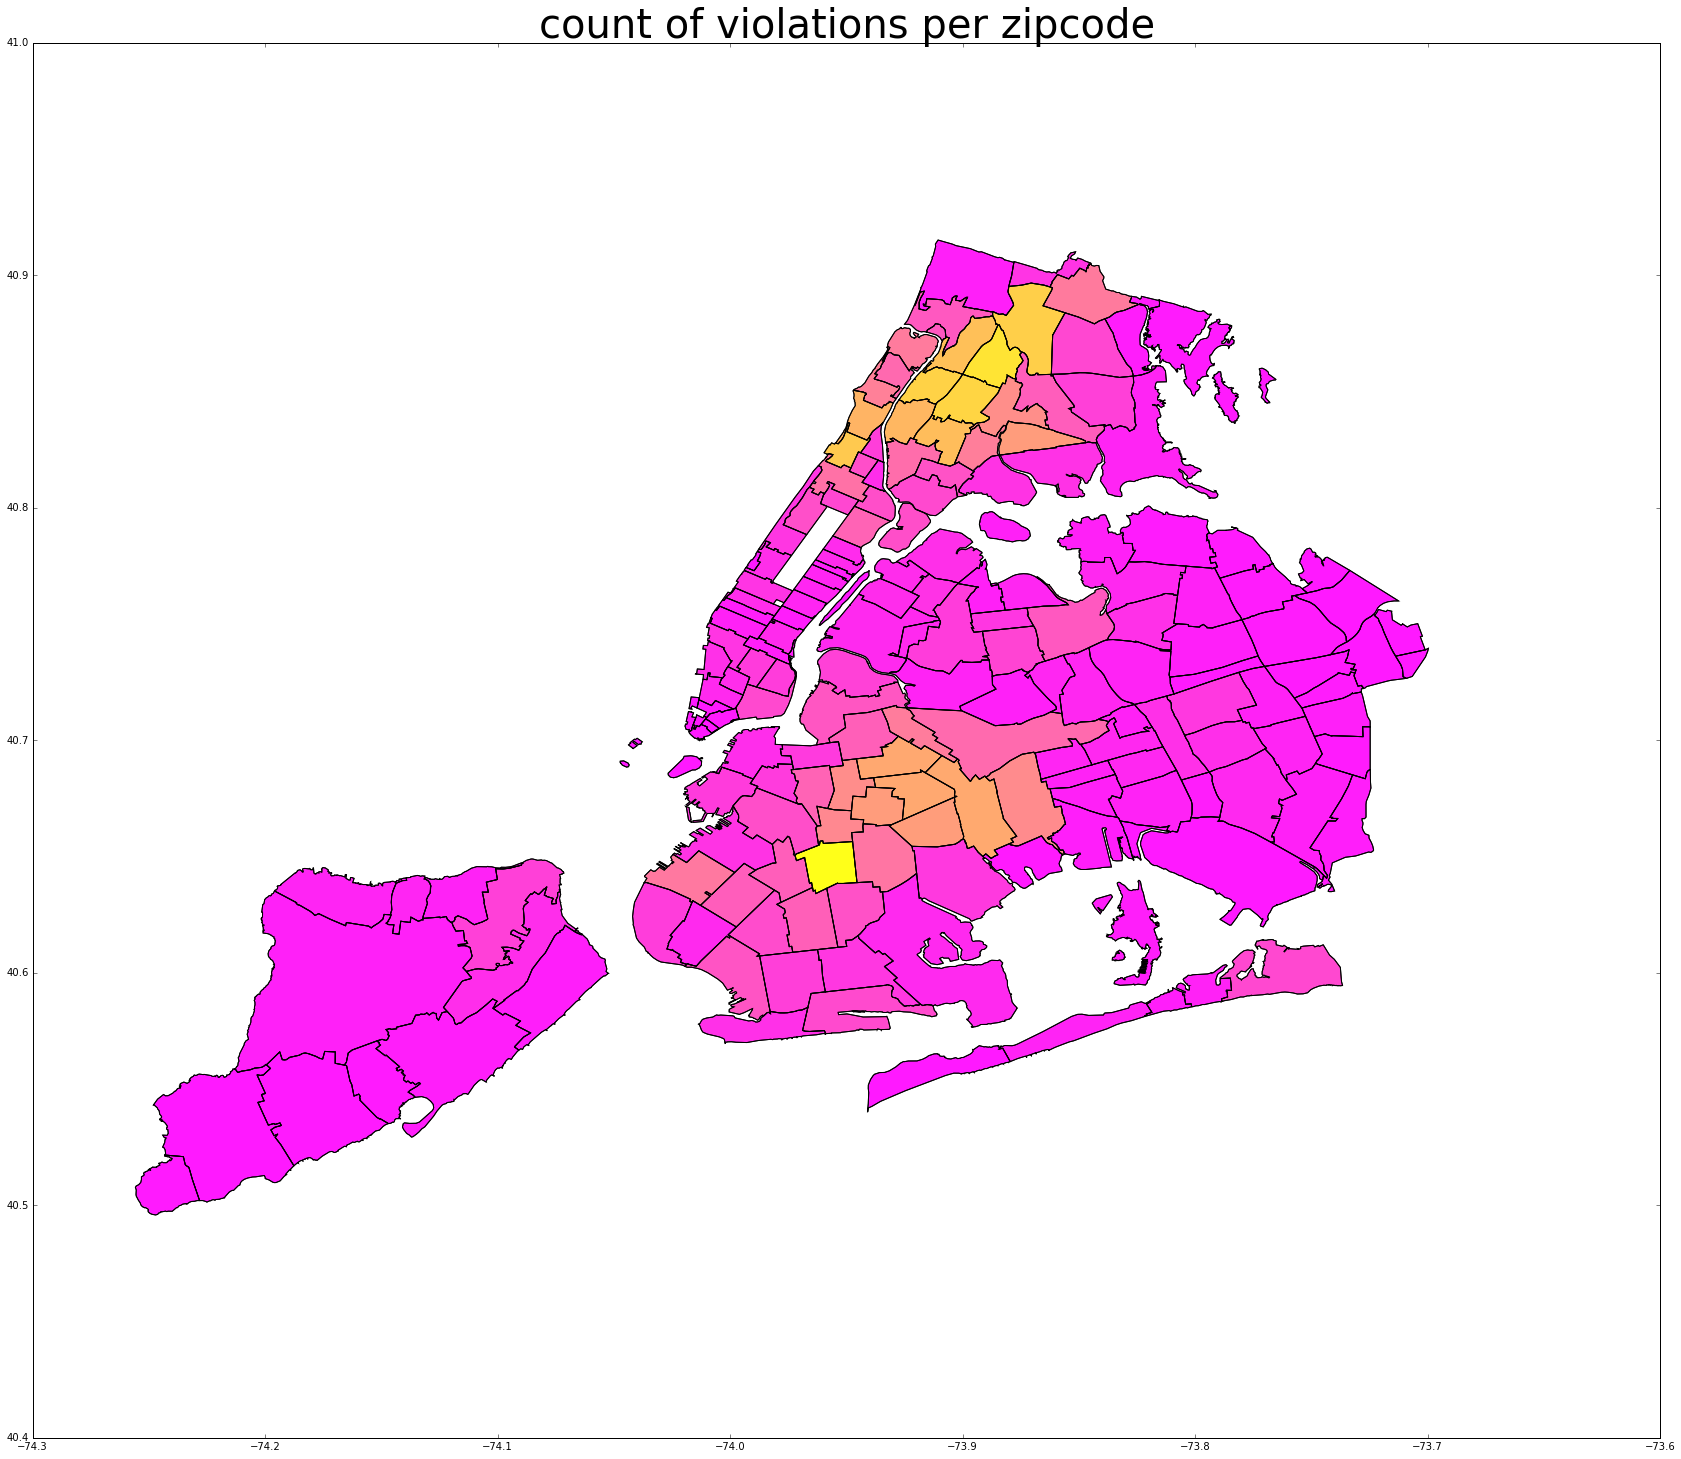

In [18]:
#visualizatoin of count of visualtizations 
plt.figure(figsize=(30,25))
violationzip.plot(column ='Boro',colormap='spring', alpha=0.9)
plt.title('count of violations per zipcode',fontsize=40)

# next step= visualize per capita in every zip 


## mapping count of complaints per zipcode


In [19]:
complaints = complaints.rename(columns={'Zip': 'zipcode'})
complaintscount = complaints.groupby('zipcode').count()
complaintscount.head()

ComplaintID  BuildingID  BoroughID  Borough  HouseNumber  StreetName  \
zipcode                                                                         
10001           1181        1181       1181     1181         1181        1181   
10002           3626        3626       3626     3626         3626        3626   
10003           3201        3201       3201     3201         3201        3201   
10004             25          25         25       25           25          25   
10005             31          31         31       31           31          31   

         Block   Lot  Apartment  CommunityBoard  ReceivedDate  StatusID  \
zipcode                                                                   
10001     1181  1181       1181            1181          1181      1181   
10002     3626  3626       3625            3626          3626      3626   
10003     3201  3201       3201            3201          3201      3201   
10004       25    25         25              25            25        25   
10005       31    31         31              31            31        31   

         Status  StatusDate  
zipcode                      
10001      1181        1181  
10002      3626        3626  
10003      3201        3201  
10004        25          25  
10005        31          31

In [20]:
complaintscount['zipcode'] = complaintscount.index

In [21]:
complaintszip = pd.merge (zipcode,complaintscount,  how='inner', on=['zipcode'])
complaintszip.head(2)

@id  BLDGpostalCode CTY_FIPS  \
0  http://nyc.pediacities.com/Resource/PostalCode...               0      081   
1  http://nyc.pediacities.com/Resource/PostalCode...               0      081   

   OBJECTID          PO_NAME STATE ST_FIPS     Shape_Area    Shape_Leng  \
0         1  Jackson Heights    NY      36  20163283.8744  20624.692317   
1         2        Glen Oaks    NY      36  22606526.9139  23002.816039   

  borough     ...     HouseNumber  StreetName  Block   Lot  Apartment  \
0  Queens     ...            2769        2769   2769  2769       2768   
1  Queens     ...             102         102    102   102        102   

   CommunityBoard  ReceivedDate  StatusID  Status  StatusDate  
0            2769          2769      2769    2769        2769  
1             102           102       102     102         102  

[2 rows x 26 columns]

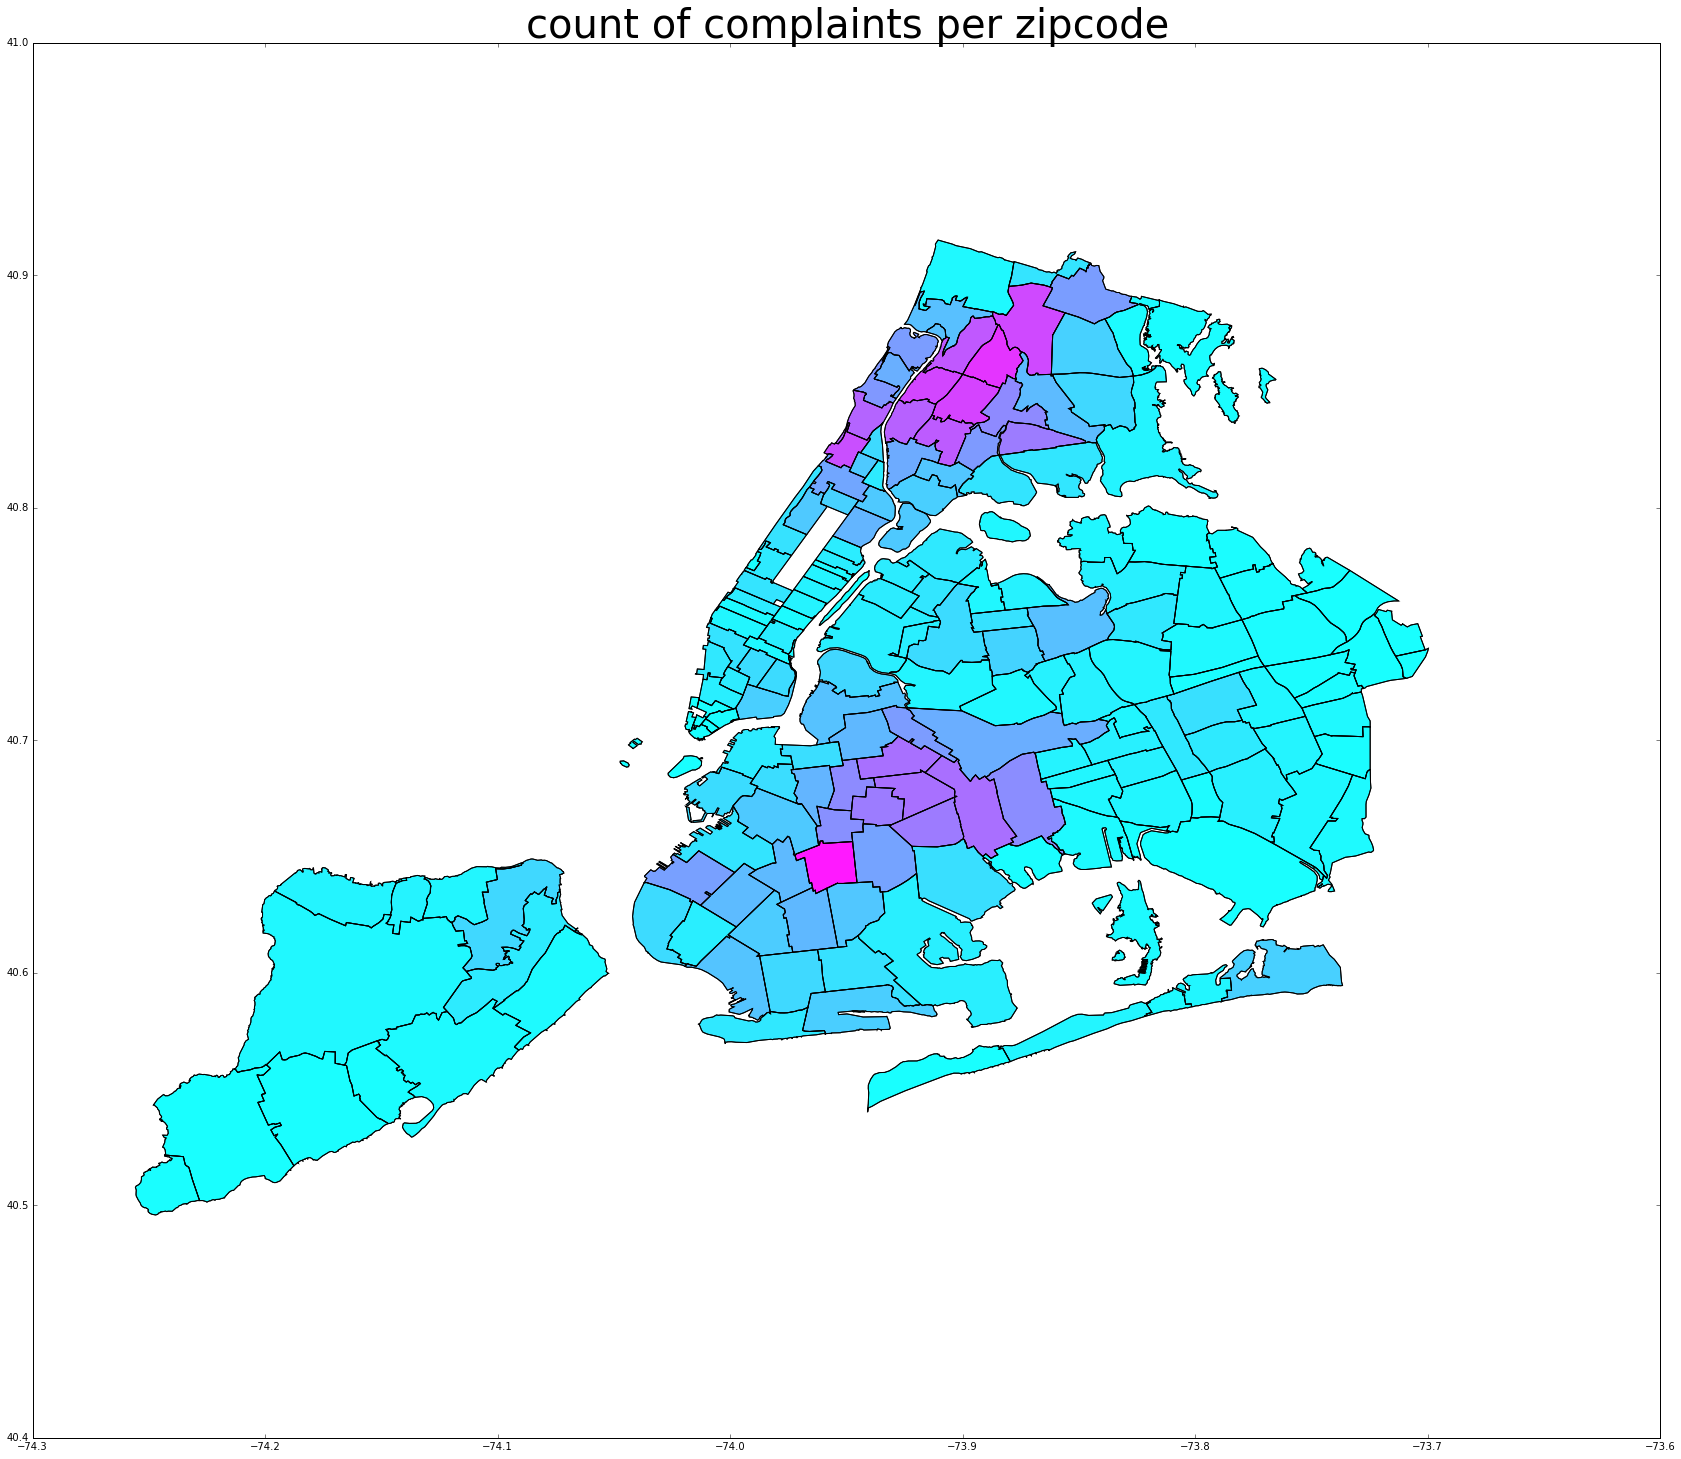

In [22]:
plt.figure(figsize=(30,25))
violationzip.plot(column ='Lot',colormap='cool', alpha=0.9)
plt.title('count of complaints per zipcode',fontsize=40)


In [23]:
# still working on plotting difrrence in violations / complaints per zip 

In [27]:
viol_compla_zip.head(10)

@id_x  BLDGpostalCode_x  \
0  http://nyc.pediacities.com/Resource/PostalCode...                 0   
1  http://nyc.pediacities.com/Resource/PostalCode...                 0   
2  http://nyc.pediacities.com/Resource/PostalCode...                 0   
3  http://nyc.pediacities.com/Resource/PostalCode...                 0   
4  http://nyc.pediacities.com/Resource/PostalCode...                 0   
5  http://nyc.pediacities.com/Resource/PostalCode...                 0   
6  http://nyc.pediacities.com/Resource/PostalCode...                 0   
7  http://nyc.pediacities.com/Resource/PostalCode...                 0   
8  http://nyc.pediacities.com/Resource/PostalCode...                 0   
9  http://nyc.pediacities.com/Resource/PostalCode...                 0   

  CTY_FIPS_x  OBJECTID_x        PO_NAME_x STATE_x ST_FIPS_x    Shape_Area_x  \
0        081           1  Jackson Heights      NY        36  20163283.87440   
1        081           2        Glen Oaks      NY        36  22606526.91390   
2        081           4        Bellerose      NY        36  49418364.05770   
3        081           5    Fresh Meadows      NY        36  69385865.59430   
4        081           6         Elmhurst      NY        36  42659399.89820   
5        081           7      Floral Park      NY        36   9155180.26263   
6        081           8     Forest Hills      NY        36  55587771.83500   
7        081           9   Queens Village      NY        36  39568339.27480   
8        081          10        Rego Park      NY        36  25203458.86890   
9        081          11    Fresh Meadows      NY        36  20358592.75020   

   Shape_Leng_x borough_x     ...     HouseNumber_y  StreetName_y  Block_y  \
0  20624.692317    Queens     ...              2769          2769     2769   
1  23002.816039    Queens     ...               102           102      102   
2  35932.810639    Queens     ...                82            82       82   
3  38693.565676    Queens     ...               354           354      354   
4  33755.870988    Queens     ...              3928          3928     3928   
5  13594.924549    Queens     ...                21            21       21   
6  36277.076839    Queens     ...              2405          2405     2405   
7  31231.968593    Queens     ...               504           504      504   
8  26323.994393    Queens     ...              2792          2792     2792   
9  27282.736836    Queens     ...               144           144      144   

   Lot_y  Apartment_y  CommunityBoard  ReceivedDate  StatusID  Status  \
0   2769         2768            2769          2769      2769    2769   
1    102          102             102           102       102     102   
2     82           82              82            82        82      82   
3    354          354             354           354       354     354   
4   3928         3928            3928          3928      3928    3928   
5     21           21              21            21        21      21   
6   2405         2405            2405          2405      2405    2405   
7    504          504             504           504       504     504   
8   2792         2792            2792          2792      2792    2792   
9    144          144             144           144       144     144   

   StatusDate  
0        2769  
1         102  
2          82  
3         354  
4        3928  
5          21  
6        2405  
7         504  
8        2792  
9         144  

[10 rows x 56 columns]

is both violations and complaints for the same period of time? 

In [32]:
rats = pd.read_csv('Rodent_Inspection.csv')

In [35]:
rats.shape

(922123, 20)

In [36]:
print rats.dtypes

INSPECTION_TYPE                 object
JOB_TICKET_OR_WORK_ORDER_ID      int64
JOB_ID                          object
JOB_PROGRESS                     int64
BBL                              int64
BORO_CODE                        int64
BLOCK                            int64
LOT                              int64
HOUSE_NUMBER                    object
STREET_NAME                     object
ZIP_CODE                       float64
X_COORD                        float64
Y_COORD                        float64
LATITUDE                       float64
LONGITUDE                      float64
BOROUGH                         object
INSPECTION_DATE                 object
RESULT                          object
APPROVED_DATE                   object
LOCATION                        object
dtype: object


In [53]:
print rats.head(2)

  INSPECTION_TYPE  JOB_TICKET_OR_WORK_ORDER_ID    JOB_ID  JOB_PROGRESS  \
0         INITIAL                       226363  PO226363             1   
1         INITIAL                       503936  PO503936             1   

          BBL  BORO_CODE  BLOCK  LOT HOUSE_NUMBER     STREET_NAME  zipcode  \
0  2025160051          2   2516   51         1181   NELSON AVENUE    10452   
1  1013760021          1   1376   21          673  MADISON AVENUE    10065   

   X_COORD  Y_COORD   LATITUDE  LONGITUDE    BOROUGH         INSPECTION_DATE  \
0  1004702   244358  40.837336 -73.926076      Bronx  12/23/2010 01:13:47 PM   
1   992513   217928  40.764834 -73.970170  Manhattan  07/16/2012 12:00:22 PM   

               RESULT           APPROVED_DATE  \
0  Problem Conditions  01/03/2011 09:08:10 AM   
1   Passed Inspection  07/17/2012 12:52:42 PM   

                                LOCATION  
0  (40.8373357937502, -73.9260760411339)  
1   (40.7648338209918, -73.970170030122)  


In [52]:
zipcode['zipcode'] = zipcode['zipcode'].astype(float)
rats = rats.rename(columns={'ZIP_CODE': 'zipcode'})
rats['zipcode'] = rats['zipcode'].astype(float)
ratscount = rats.groupby('zipcode').count()
ratscount['zipcode'] = ratscount.index
ratscount.head(2)

INSPECTION_TYPE  JOB_TICKET_OR_WORK_ORDER_ID  JOB_ID  JOB_PROGRESS  \
zipcode                                                                       
0                   1338                         1338    1338          1338   
1                      2                            2       2             2   

          BBL  BORO_CODE  BLOCK   LOT  HOUSE_NUMBER  STREET_NAME  X_COORD  \
zipcode                                                                     
0        1338       1338   1338  1338           482         1059      922   
1           2          2      2     2             2            2        0   

         Y_COORD  LATITUDE  LONGITUDE  BOROUGH  INSPECTION_DATE  RESULT  \
zipcode                                                                   
0            922      1295       1295     1338             1338    1338   
1              0         0          0        2                2       2   

         APPROVED_DATE  LOCATION  zipcode  
zipcode                                    
0                 1338      1295        0  
1                    2         0        1

In [47]:
ratszip = pd.merge(zipcode,ratscount,how='inner', on=['zipcode'] )

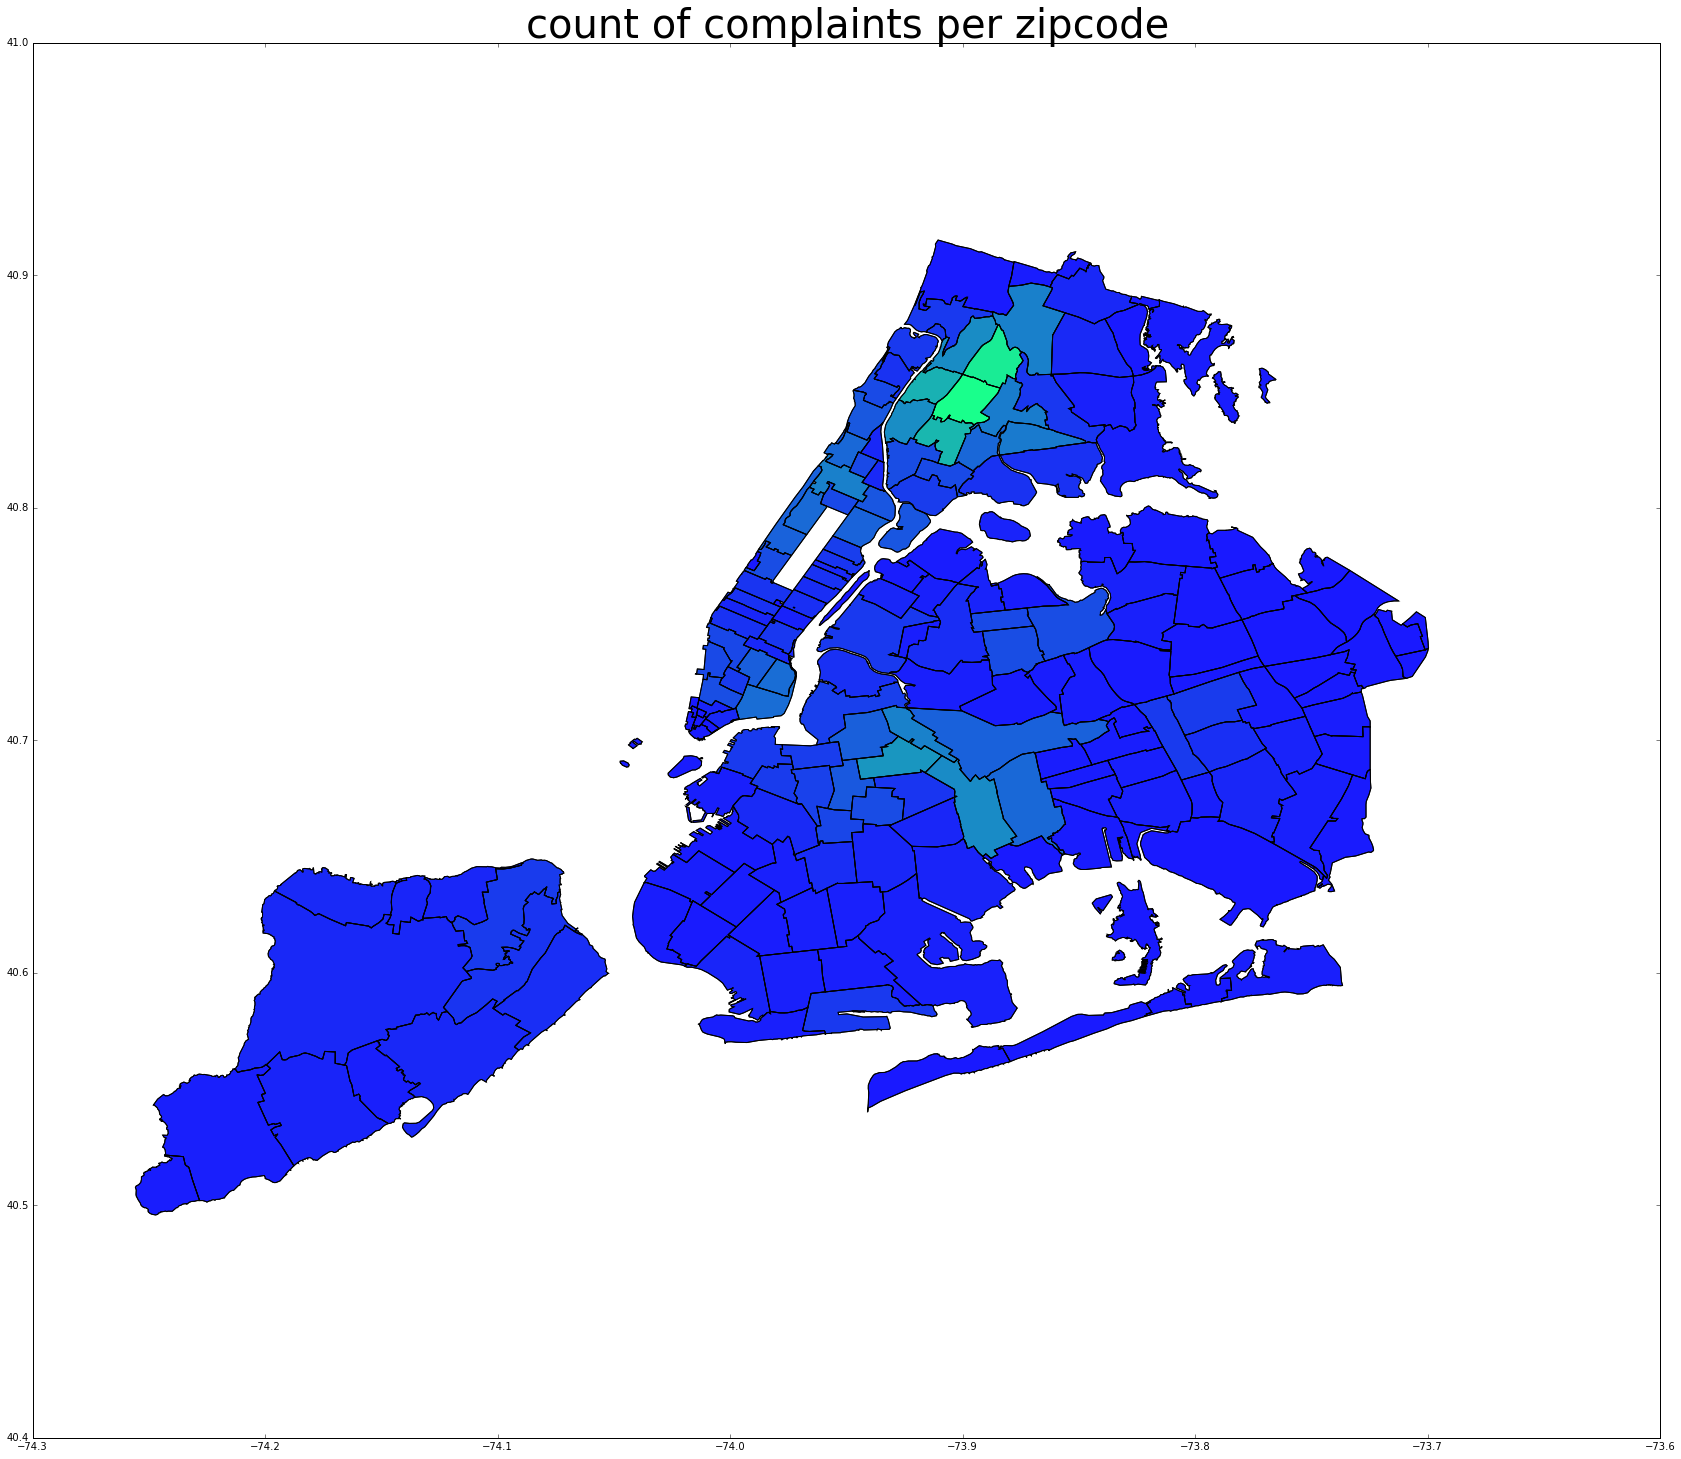

In [51]:
plt.figure(figsize=(30,25))
ratszip.plot(column ='BBL',colormap='winter', alpha=0.9)
plt.title('count of complaints per zipcode',fontsize=40)